In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

from sklearn.tree import DecisionTreeClassifier

In [55]:
data = pd.read_csv("wdbc.data", header=None)
data = data.drop(0, 1) # first column is an ID number; drop it
data[1] = data[1].apply(lambda x: 1 if x == 'M' else -1, 1) # Mark malignant cases ("M") as 1, benign cases ("B") as -1

In [56]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [57]:
# Split into training and test data
training_data = data.head(400)
test_data = data.tail(169)
X_train, X_test = training_data.ix[:, 2:], test_data.ix[:, 2:]
Y_train, Y_test = training_data.ix[:, 1], test_data.ix[:, 1]

# Question A: Minimal leaf node size as stopping criterion

In [110]:
training_errors = []
test_errors = []
for min_size in range(1, 26):
    dtree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=min_size)
    dtree.fit(X_train, Y_train)
    
    # Compute training and test error
    training_errors.append(1 - dtree.score(X_train, Y_train))
    test_errors.append(1 - dtree.score(X_test, Y_test))
    

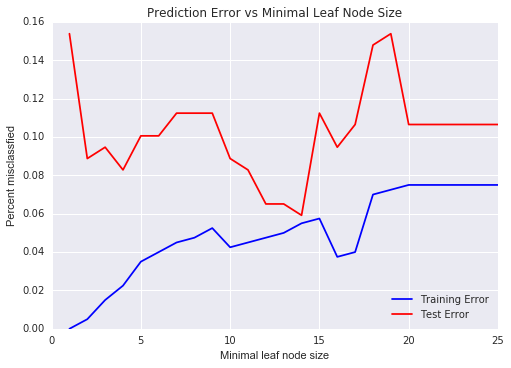

In [111]:
plt.plot(range(1, 26), training_errors, 'b-', label='Training Error')
plt.plot(range(1, 26), test_errors, 'r-', label='Test Error')
plt.xlabel('Minimal leaf node size')
plt.ylabel('Percent misclassfied')
plt.title('Prediction Error vs Minimal Leaf Node Size')
plt.legend(loc='best')
plt.savefig('min_leaf_node_size')
plt.show()

In [112]:
test_errors.index(min(test_errors))

13

In [113]:
range(1, 26)[12]

13

# Question B: Maximal tree depth as stopping criterion

In [114]:
training_errors = []
test_errors = []
for max_depth in range(2, 21):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=max_depth)
    dtree.fit(X_train, Y_train)
    
    # Compute training and test error
    training_errors.append(1 - dtree.score(X_train, Y_train))
    test_errors.append(1 - dtree.score(X_test, Y_test))
    

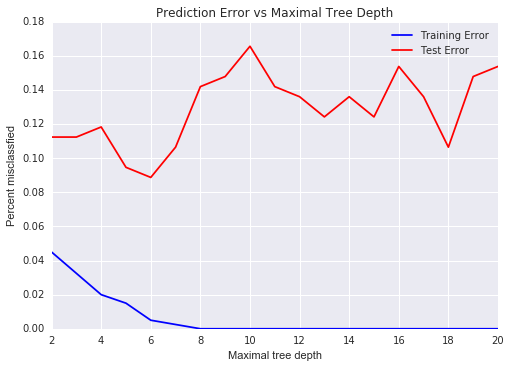

In [115]:
plt.plot(range(2, 21), training_errors, 'b-', label='Training Error')
plt.plot(range(2, 21), test_errors, 'r-', label='Test Error')
plt.xlabel('Maximal tree depth')
plt.ylabel('Percent misclassfied')
plt.title('Prediction Error vs Maximal Tree Depth')
plt.legend(loc='best')
plt.savefig('max_tree_depth')
plt.show()